AI MOOC，免费人工智能学习平台：www.ai-xlab.com
![](https://raw.githubusercontent.com/Qinbf/tf-model-zoo/master/README_IMG/01.jpg)

In [1]:
import tensorflow as tf
import os
import numpy as np
import re
from PIL import Image
import matplotlib.pyplot as plt

/Users/qin/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


test_images/guitar1.jpg


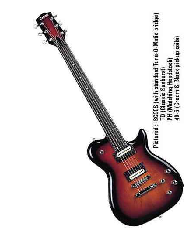

guitar (score = 0.97191)
animal (score = 0.00875)
flower (score = 0.00734)
plane (score = 0.00605)
house (score = 0.00595)

test_images/plane2.jpg


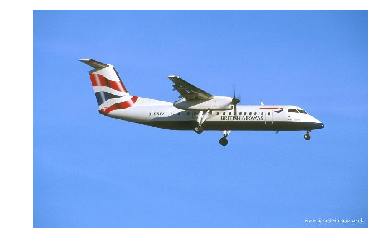

plane (score = 0.97868)
animal (score = 0.00867)
house (score = 0.00437)
flower (score = 0.00417)
guitar (score = 0.00411)

test_images/guitar2.jpg


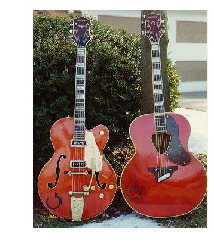

guitar (score = 0.97271)
animal (score = 0.00795)
flower (score = 0.00763)
plane (score = 0.00614)
house (score = 0.00557)

test_images/plane1.jpg


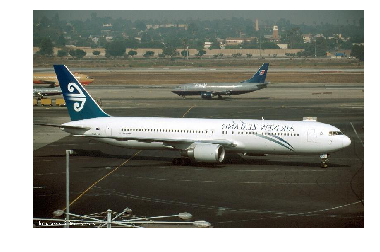

plane (score = 0.96183)
animal (score = 0.01556)
guitar (score = 0.00848)
flower (score = 0.00711)
house (score = 0.00702)

test_images/animal1.jpg


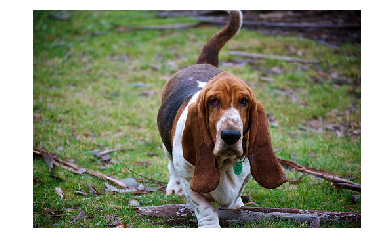

animal (score = 0.45578)
plane (score = 0.19693)
flower (score = 0.12895)
house (score = 0.10962)
guitar (score = 0.10872)

test_images/flower1.jpg


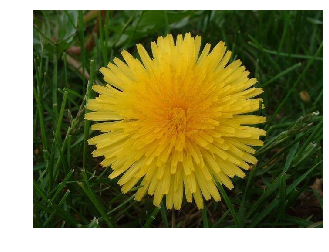

flower (score = 0.98865)
animal (score = 0.00389)
plane (score = 0.00307)
house (score = 0.00265)
guitar (score = 0.00174)

test_images/house2.jpg


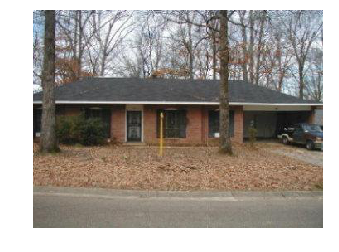

house (score = 0.98719)
animal (score = 0.00508)
flower (score = 0.00306)
plane (score = 0.00298)
guitar (score = 0.00168)

test_images/animal2.jpg


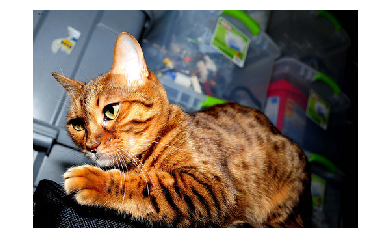

animal (score = 0.91497)
flower (score = 0.02622)
plane (score = 0.02604)
guitar (score = 0.01742)
house (score = 0.01535)

test_images/flower2.jpg


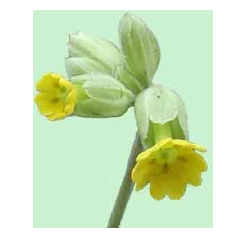

flower (score = 0.98323)
house (score = 0.00574)
animal (score = 0.00448)
plane (score = 0.00357)
guitar (score = 0.00299)

test_images/house1.jpg


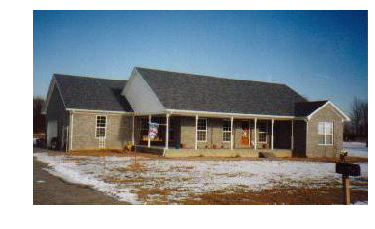

house (score = 0.93331)
flower (score = 0.02377)
animal (score = 0.02134)
plane (score = 0.01249)
guitar (score = 0.00909)



In [7]:
lines = tf.gfile.GFile('output_labels.txt').readlines()
uid_to_human = {}

# 一行一行读取数据
for uid,line in enumerate(lines) :
    #去掉换行符
    line=line.strip('\n')
    uid_to_human[uid] = line

# 分类编号变成描述
def id_to_string(node_id):
    if node_id not in uid_to_human:
        return ''
    return uid_to_human[node_id]


# 创建一个图来存放训练好的模型
with tf.gfile.FastGFile('output_graph.pb', 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    tf.import_graph_def(graph_def, name='')


with tf.Session() as sess:
    # final_result为输出tensor的名字
    softmax_tensor = sess.graph.get_tensor_by_name('final_result:0')
    # 遍历目录
    for root,dirs,files in os.walk('test_images/'):
        for file in files:
            # 载入图片
            image_data = tf.gfile.FastGFile(os.path.join(root,file), 'rb').read()
            # 把图像数据传入模型获得模型输出结果
            predictions = sess.run(softmax_tensor,{'DecodeJpeg/contents:0': image_data})
            # 把结果转为1维数据
            predictions = np.squeeze(predictions)
            # 打印图片路径及名称
            image_path = os.path.join(root,file)
            print(image_path)
            # 显示图片
            img=Image.open(image_path)
            plt.imshow(img)
            plt.axis('off')
            plt.show()

            # 排序
            top_k = predictions.argsort()[::-1]
            for node_id in top_k:     
                # 获取分类名称
                human_string = id_to_string(node_id)
                # 获取该分类的置信度
                score = predictions[node_id]
                print('%s (score = %.5f)' % (human_string, score))
            print()